In [3]:
import pandas as pd
import numpy as np
import gensim
import pymorphy2
model = gensim.models.Word2Vec.load("data//models//w2v_model_w9m30.model")

In [5]:
def most_sim(word, topn):
    sim_list = model.wv.most_similar(positive = word, negative = [], topn=topn)
    len_list = list(map(len, [i[0] for i in sim_list]))
    len_max = max(len_list)
    for ix, word in enumerate(sim_list):
        count = model.wv.get_vecattr(word[0], "count")
        space = ' '*(len_max - len(word[0]) + 4)
        print(f"('{word[0]}', {str(word[1])[0:10]}),{space}count = {count}")
    len_max

In [6]:
most_sim(['интуиция'], 28)

('чутьё', 0.48074173),               count = 340
('ясновидение', 0.47376361),         count = 1184
('экстрасенсорный', 0.45804941),     count = 638
('интуитивный', 0.45753526),         count = 2084
('прислушиваться', 0.45693892),      count = 3665
('проницательность', 0.44733709),    count = 320
('вещий', 0.44039678),               count = 370
('предвидение', 0.43397447),         count = 214
('чувствительность', 0.43318748),    count = 2394
('чувствование', 0.43089050),        count = 1247
('яснознание', 0.42417365),          count = 290
('довериться', 0.41121897),          count = 2772
('доверять', 0.40909326),            count = 10014
('развить', 0.40791428),             count = 10185
('озарение', 0.40514966),            count = 1862
('интуитивно', 0.39888742),          count = 1713
('чуйка', 0.39785555),               count = 121
('способность', 0.39080318),         count = 38387
('божественный', 0.39008265),        count = 4517
('жрица', 0.38296410),               count = 939
('обо

In [5]:
with open('data//new_age and self_enh keywords.txt' , encoding = 'ANSI') as f:
    lines = f.readlines()
str1 = lines[0]
str2 = lines[2]

new_age_raw = str1.split(', ')
self_enh_raw = str2.split(', ')
morph = pymorphy2.MorphAnalyzer()
new_age = []
self_enh = self_enh_raw
for word in new_age_raw:
    new_age.append(morph.parse(word.replace("\n", ""))[0].normal_form)
keys = new_age + self_enh

In [7]:
# for key in keys0
    print(key, model.wv.get_vecattr(key, "count") )

индуизм 253
буддизм 655
учение 3616
йог 8444
реинкарнация 669
искатель 584
просветлённый 466
исследователь 3043
приключение 4185
любовь 93949
отношение 173112
счастие 49748
уважение 12130
интуиция 8921
ясновидение 1184
экстрасенсорный 638
парапсихология 280
эзотерика 7270
биоэнергетика 567
космоэнергетика 748
медицина 9973
аюрведа 581
остеопатия 505
медитация 28083
таро 22014
астрология 10078
родиться 13075
энергия 117159
целостность 3633
коучий 32821
тренинг 112524
вебинар 43741
семинар 46327
курс 291547
интенсив 19997
ретрит 595
марафон 59077
саморазвитие 35232
развитие 229852
карьера 45923
карьерный 24103
работа 437980
финансовый 51556
заработок 16819
доход 69932
личностный_рост 208913
личный_рост 5650
улучшение_себя 1187
профессиональный_рост 30108
мастеркласс 51514
улучшение_себя 1187
карьерный_рост 37169


474835

In [30]:
def average_vector(model, words_list):
    n = 0
    sum_vector = 0
    for word in words_list:
        if word in model.wv:
            word_vector = model.wv[word]
            sum_vector = sum_vector +  word_vector
            n = n + 1
    if n>0 :
        return sum_vector/n
    else:
        return model.wv['слово']*0

with open('data//new_age_topic2.txt' , encoding = 'ANSI') as f:
    lines = f.readlines()
lines
new_age_topics = {}
for line in lines:
    list_line = line.replace("\n", "").split(' ')
    new_age_topics[list_line[0]] = list_line[1:]
    
with open('data//self_enhancement_topic2.txt' , encoding = 'ANSI') as f:
    lines = f.readlines()
lines
self_enhancement_topics = {}
for line in lines:
    list_line = line.replace("\n", "").split(' ')
    self_enhancement_topics[list_line[0]] = list_line[1:]
    
new_age = new_age_topics['new_age']
self_enh = self_enhancement_topics['Self_Enhancement']

new_age_vector = average_vector(model, new_age)
self_enh_vector = average_vector(model, self_enh)

In [32]:
with open('data\\norm_text_colloc.txt') as f:
    lines = f.read().splitlines()
len(lines)

474835

In [33]:
from tqdm import tqdm
new_age_scores = []
self_enh_scores = []
pairs = 
for line in tqdm(lines):
    text = line.split(' ')
    text_vector = average_vector(model, text)
    new_age_score = np.dot(text_vector, new_age_vector) /( np.linalg.norm(text_vector)*np.linalg.norm(new_age_vector))
    self_enh_score = np.dot(text_vector, self_enh_vector) /( np.linalg.norm(text_vector)*np.linalg.norm(self_enh_vector))
    new_age_scores.append(new_age_score)
    self_enh_scores.append(self_enh_score)

  1%|          | 4119/474835 [00:05<09:35, 817.69it/s]C:\Temp\ipykernel_10872\2452694544.py:7: RuntimeWarning: invalid value encountered in float_scalars
  new_age_score = np.dot(text_vector, new_age_vector) /( np.linalg.norm(text_vector)*np.linalg.norm(new_age_vector))
C:\Temp\ipykernel_10872\2452694544.py:8: RuntimeWarning: invalid value encountered in float_scalars
  self_enh_score = np.dot(text_vector, self_enh_vector) /( np.linalg.norm(text_vector)*np.linalg.norm(self_enh_vector))
100%|██████████| 474835/474835 [09:36<00:00, 824.10it/s] 


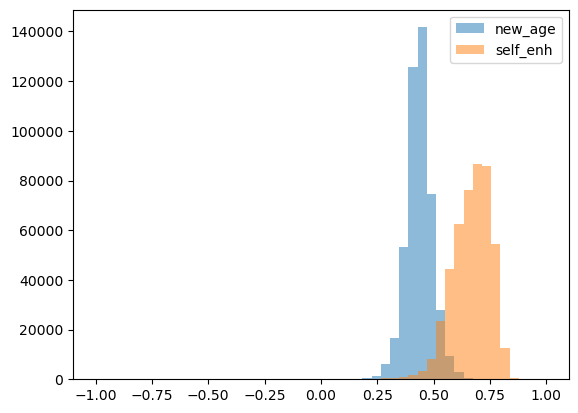

In [37]:
import numpy
from matplotlib import pyplot

bins = numpy.linspace(-1, 1)

pyplot.hist(new_age_scores, bins, alpha=0.5, label='new_age')
pyplot.hist(self_enh_scores, bins, alpha=0.5, label='self_enh')
pyplot.legend(loc='upper right')
pyplot.show()

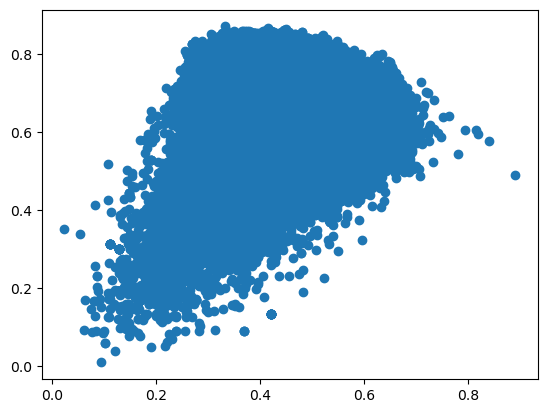

In [40]:

li = list(zip(new_age_scores, self_enh_scores))

pyplot.scatter(*zip(*li))

<Axes: xlabel='new_age', ylabel='self_enh'>

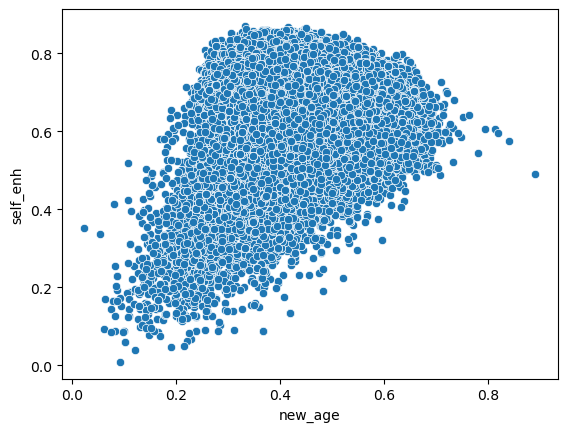

In [43]:
import seaborn as sns

scores = pd.DataFrame(
    {'new_age': new_age_scores,
     'self_enh': self_enh_scores
    })

sns.scatterplot(data=scores, x="new_age", y="self_enh")